<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Grundlagen Programmierung</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2023</b></font></div>
        </td>
    </tr>
</table>

---

# 6 Datenverarbeitung mit numpy und pandas

Im folgenden Notebook sollen Sie ein ein Energiemanagementsystem für ein Gebäude mit PV-Anlage und Elektrofahrzeug entwickeln, welches das Elektrofahrzeug mit möglichst mit lokal erzeugtem Strom lädt. Die Aufgaben sollen Ihnen Routine darin vermitteln Aufgabenstellung zu interpretieren und in Code umzusetzen. Zudem arbeiten wir mit Daten in Matrizen, Tabellen und fertigen eigene Plots an.  

## 6.1 Arbeiten mit Arrays

In [13]:
# Zunächst müssen wir einige Pakte importieren, welche uns bei unseren Aufgaben unterstützen

# Numpy erweitert das Konzept der Listen auf Mathematische Matrizen
import numpy as np

# Datetime erleichtert das Arbeiten mit Zeiten
import datetime

# Matplotlib is ein Paket zum Erstellen von Plots
import matplotlib as mpl
import matplotlib.pyplot as plt

# Pandas ermöglicht das Arbeiten mit Tabellarischen Daten
import pandas as pd

Zunächst legen wir einen Tag an. Der Numpy array `timestamps` enthält nur einen Eintrag für jede Stunde des Tages als Datum (schön formatierte Unix-time). `steps` hingegen enthält genau die Stunde als Integer.

In [14]:
# Set the simulation parameters
## Startzeitpunkt mit speziellem Datentyp für Zeitpunkte
start_time = pd.Timestamp("2023-07-17 00:00:00")
end_time = pd.Timestamp("2023-07-18 00:00:00")

# Anzahl der 60 Minutenschritte im Zeitraum
num_periods = int((end_time - start_time) / pd.Timedelta(minutes=60))
steps =  list(range(num_periods))

# Create the timestamp array
timestamps = np.arange(start_time, end_time, np.timedelta64(60, "m"))

# Ausgabe zur Kontrolle
timestamps[0:5]

array(['2023-07-17T00:00:00.000000', '2023-07-17T01:00:00.000000',
       '2023-07-17T02:00:00.000000', '2023-07-17T03:00:00.000000',
       '2023-07-17T04:00:00.000000'], dtype='datetime64[us]')

✍️ **Aufgabe**

Zeigen Sie sich die ersten 10 Werte des Arrays `steps` an. Für Arrays gilt die selbe Notation, die Sie von Listen kennen.

In [15]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

steps[0:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Als nächstes simulieren wir die Daten des Gebäudes und Plotten diese. Wir beginnen mit dem Strombedarf:

Text(0, 0.5, 'Strombedarf in kWh')

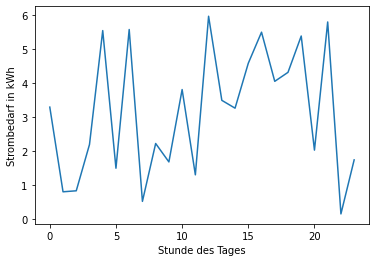

In [16]:
# Simulate electricity consumption (kWh)
consumption_kWh = np.random.uniform(0, 6, num_periods)


# Plottet die Daten
plt.plot(steps, consumption_kWh) # Der erste übergebene Array ist die X-, der zweite die Y-Achse

# Integriert eine Bezeichnung der x-Achse
plt.xlabel("Stunde des Tages")

# Integriert eine Bezeichnung der y-Achse
plt.ylabel("Strombedarf in kWh")

Als nächstes simulieren wir die Erzeugung der PV-Anlage:

In [17]:
pv_generation_kWh = np.zeros(len(timestamps))

pv_generation_kWh[7:19] = 3
pv_generation_kWh[8:18] = 5
pv_generation_kWh[10:16] = 6
pv_generation_kWh[12:14] = 6.5

✍️ **Aufgabe**

Erstellen Sie einen Plot, der die PV-Erzeugung visualisiert. Kopieren Sie dazu den Code von oben und passen Sie ihn an.

Text(0, 0.5, 'PV-Erzeugung in kWh')

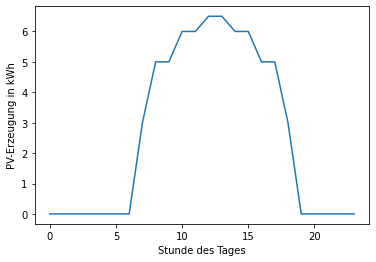

In [18]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# Plottet die Daten
plt.plot(steps, pv_generation_kWh)

# Integriert eine Bezeichnung der x-Achse
plt.xlabel("Stunde des Tages")

# Integriert eine Bezeichnung der y-Achse
plt.ylabel("PV-Erzeugung in kWh")

Zuletzt bereiten wir Daten für das Elektrofahrzeug (Battery Electric Vehicle / BEV) vor. Der Array `bev_connection` speichert, ob ein Elektrofahrzeug gerade mit der Ladestation verbunden ist. In `bev_soc_kWh` wird der aktuelle Füllstand der Batterie (State of Charge / SoC) gespeichert.

Wir nehmen an, dass das Fahrzeug um 13 Uhr eingesteckt wird und zu diesem Zeitpunkt mit 15 kWh geladen ist. Die Batteriegröße `bev_max_soc_kWh` beträgt 75 kWh.

Text(0, 0.5, 'Anwesenheit des Elektrofahrzeuges')

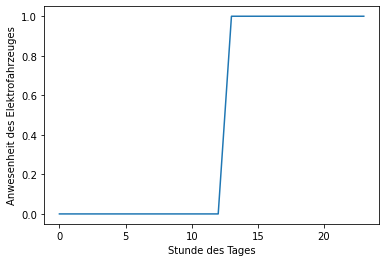

In [19]:
# Lege zunächst einen Array mit 24 Nullen an
bev_connection = np.zeros(len(timestamps))
# Fülle alle Werte ab dem 13. mit 1 (=BEV ist verbunden)
bev_connection[13:] = 1

# Lege zunächst einen Array mit 24 Nullen an
bev_soc_kWh = np.zeros(len(timestamps))
# Zu Beginn ist das Fahrzeug mit 15 kWh geladen. Alle Werte dahinter bleiben zunächst mit 0 befüllt, da wir diese noch nicht kennen.
bev_soc_kWh[13] = 15

# Maximaler SoC des Fahrzeugs
bev_max_soc_kWh = 75

# Plottet die Daten
plt.plot(steps, bev_connection)

# Integriert eine Bezeichnung der x-Achse
plt.xlabel("Stunde des Tages")

# Integriert eine Bezeichnung der y-Achse
plt.ylabel("Anwesenheit des Elektrofahrzeuges")

✍️ **Aufgabe**

Schreiben Sie eine Funktion, die für einen Zeitpunkt zurück gibt, ob gerade geladen wird oder nicht (`True` (es wird geladen) oder `False`).

Geladen werden kann nur, wenn das BEV gerade verbunden ist (`bev_connection == True`). Das Elektrofahrzeug lädt immer, wenn der SoC (`soc`) unter 10 kWh ist oder sobald mehr PV-Strom (`pv_generation_kWh`) erzeugt wird als das Gebäude verbraucht (`consumption_kWh`).

Wenn es Ihnen hilft, zeichnen Sie zunächst ein UML-Aktivitätsdiagramm.

In [20]:
def charge_bev(bev_connection, soc, pv_generation_kWh, consumption_kWh):
    # Fügen Sie hier Ihren Code ein:

SyntaxError: unexpected EOF while parsing (<ipython-input-20-ab64d4b4803c>, line 2)

In [ ]:
# Testen der Funktion: Sollte True ausgeben
charge_bev(bev_connection = True, soc = 50, pv_generation_kWh = 20, consumption_kWh = 10)

NameError: name 'charge_bev' is not defined

In [21]:
# Testen der Funktion: Sollte False ausgeben
charge_bev(bev_connection = True, soc = 50, pv_generation_kWh = 5, consumption_kWh = 10)

NameError: name 'charge_bev' is not defined

In [ ]:
# Testen der Funktion: Sollte True ausgeben
charge_bev(bev_connection = True, soc = 5, pv_generation_kWh = 5, consumption_kWh = 10)

NameError: name 'charge_bev' is not defined

In [22]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
 
def charge_bev(bev_connection, soc, pv_generation_kWh, consumption_kWh):
    charge  = False

    if bev_connection == False:
        return False
    elif soc < 10 or pv_generation_kWh > consumption_kWh:
        return True
    else:
        return False

✍️ **Aufgabe**

Schreiben Sie eine Funktion, die die Ladeleistung des Fahrzeuges in kW als `float` zurück gibt. Dabei soll folgendes gelten: Die Ladeleistung ist 0 kW, wenn nicht geladen wird. Bei einem Ladestand (SoC) unter 10 kWh wird immer mit der maximal möglichen Ladeleistung und 11 kW geladen. In allen anderen Fällen wird maximal mit der Überschussleistung der PV-Anlage geladen werden. 
Hierzu müssen Sie den Gebäudestrombedarf von der Erzeugung abziehen. Beachten Sie, dass wir die Erzeugung und den Gebäudestrombedarf als Energie und nicht als Leistung gegeben haben. Achten Sie zudem darauf, dass sie die Batterie des Fahrzeuges nicht überladen können.

In [23]:
def charge_bev_speed(charge, soc, max_soc, pv_generation_kWh, consumption_kWh):
    # Fügen Sie hier Ihren Code ein:

SyntaxError: unexpected EOF while parsing (<ipython-input-23-21310d62f1b4>, line 2)

In [24]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
# Da wird in einem Raster von 1h Arbeiten, können wir direkt von kW ind kWh umrechnen, indem wir wir Werte mit 1 (h) multiplizieren


def charge_bev_speed(charge, soc, max_soc, pv_generation_kWh, consumption_kWh):
    capacity_left = max_soc - soc
    #print(capacity_left)
    if charge == False:
        return 0
    elif soc < 10:
        return 11
    else:     
        return max(0, min(capacity_left, pv_generation_kWh - consumption_kWh))


In [25]:
# Testen der Funktion
charge_bev_speed(charge = True, soc = 70 , max_soc = 75, pv_generation_kWh = 20 ,consumption_kWh = 10)

5

Nun, da Ihre Funktionen funktionieren, können wir diese in ein simuliertes System einbauen. Um das Zusammenspiel zu evaluieren, werden wir aber zunächst einen Tag simulieren. Im echten System würden die Funktionen z.B. in einer `while`-Schleife verwendet und immer wieder aufgerufen werden. Da wir nur einen Tag simulieren, nutzen wir die `for`-Schleife durch unseren simulierten Tag iteriert. 
Über `index, time in enumerate(timestamps)` können wir in die Schleife über `index` den jeweils n-ten-Eintrag in jeder Liste abgreifen. Da allen Liste genau 24 Einträge lang sind, erhalten wir so immer genau die Einträge, die zusammen gehören. 

In [26]:
charge = []
charging_speed_kW = []

for index, time in enumerate(timestamps):
    print("Jetzt ist die {}. Stunde. Genauer gesagt {}".format(index, timestamps[index]))

    # Rufen Sie charge_bev() auf, um zu überprüfen, ob gerade geladen werden sollte und fügen Sei das Ergebnis an die Liste charge an
    ## Kopieren Sie einen der Test von oben hinein und passen diesen dann so an, dass er auf die richtigen Element der richtigen Liste zugreift
    ## Zudem sollten Sie das Ergebnis an die leere Liste charge anhängen

    # Rufen Sie current_charging_speed_kWh() auf, um die aktuelle Ladegeschwindigkeit zu bestimmen.
    # Beachten Sie dabei, dass Sie dazu den aktuellen SoC berücksichtigen müssen, der in der Zeile index-1 steht!
    
    # fügen Sei das Ergebnis an die Liste charging_speed_kW an

    # Updaten sie die Liste bev_soc_kWh an der aktuellen Stelle. 
    # Beachten Sie dabei, dass Sie dazu den aktuellen SoC aus der Zeile davor mit der charging_speed_kW (*1h) addieren müssen

Jetzt ist die 0. Stunde. Genauer gesagt 2023-07-17T00:00:00.000000
Jetzt ist die 1. Stunde. Genauer gesagt 2023-07-17T01:00:00.000000
Jetzt ist die 2. Stunde. Genauer gesagt 2023-07-17T02:00:00.000000
Jetzt ist die 3. Stunde. Genauer gesagt 2023-07-17T03:00:00.000000
Jetzt ist die 4. Stunde. Genauer gesagt 2023-07-17T04:00:00.000000
Jetzt ist die 5. Stunde. Genauer gesagt 2023-07-17T05:00:00.000000
Jetzt ist die 6. Stunde. Genauer gesagt 2023-07-17T06:00:00.000000
Jetzt ist die 7. Stunde. Genauer gesagt 2023-07-17T07:00:00.000000
Jetzt ist die 8. Stunde. Genauer gesagt 2023-07-17T08:00:00.000000
Jetzt ist die 9. Stunde. Genauer gesagt 2023-07-17T09:00:00.000000
Jetzt ist die 10. Stunde. Genauer gesagt 2023-07-17T10:00:00.000000
Jetzt ist die 11. Stunde. Genauer gesagt 2023-07-17T11:00:00.000000
Jetzt ist die 12. Stunde. Genauer gesagt 2023-07-17T12:00:00.000000
Jetzt ist die 13. Stunde. Genauer gesagt 2023-07-17T13:00:00.000000
Jetzt ist die 14. Stunde. Genauer gesagt 2023-07-17T14:00:

In [27]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

charge = []
charging_speed_kW = []

for index, time in enumerate(timestamps):
    #print(index)
    charge.append(charge_bev(bev_connection[index], bev_soc_kWh[index],pv_generation_kWh[index], consumption_kWh[index]))
    current_charging_speed_kW = charge_bev_speed(charge[index],bev_soc_kWh[index-1], bev_max_soc_kWh,pv_generation_kWh[index], consumption_kWh[index])
    charging_speed_kW.append(current_charging_speed_kW)
    bev_soc_kWh[index] = bev_soc_kWh[index-1] + current_charging_speed_kW
#charge
#charging_speed_kWh
#bev_soc_kWh

Herzlichen Glückwunsch. Sie haben nun erfolgreich simuliert, wie das Fahrzeug geladen werden würde. Lassen Sie uns die verschiedenen Lastgänge in einer Grafik zusammenfassen:

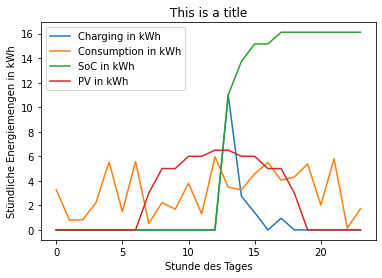

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Plottet die Daten
plt.plot(steps, charging_speed_kW)
plt.plot(steps, consumption_kWh)
plt.plot(steps, bev_soc_kWh)
plt.plot(steps, pv_generation_kWh)
# Integriert einen Titel
plt.title("This is a title")

# Integriert eine Bezeichnung der x-Achse
plt.xlabel("Stunde des Tages")

# Integriert eine Bezeichnung der y-Achse
plt.ylabel("Stündliche Energiemengen in kWh")

# Integriert die Legende
plt.legend(['Charging in kWh','Consumption in kWh', 'SoC in kWh', 'PV in kWh'])


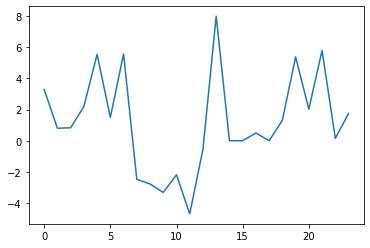

In [29]:
last_an_hausanschluss = consumption_kWh + charging_speed_kW - pv_generation_kWh
last_an_hausanschluss
plt.plot(steps, last_an_hausanschluss)

## 6.2 Vektoroperationen

✍️ **Aufgabe**

Bestimmen Sie wie viel Energie das Gebäude an diesem Tag vom Netz bezogen hat, wie viel es eingespeist hat und was die maximale durchschnittliche Last für eine Stunde am Hausanschluss an diesem Tag war.

Anschaulich müssen Sie die Zeitreihe `last_an_hausanschluss` in ihre positiven und negativen Bestandteile zerlegen und dann die Fläche unter den verbleibenden Kurven summieren. 

Berechnen Sie auch die Stromkosten für diesen Tag. Rechen Sie mit einer Einspeisevergütung von 0.20 Cent / kWh und einen Strompreis von 30 Cent /kWh.

#### Tipp 1: Subsets von Arrays auswählen

Wir haben schon gelernt, dass wir auf Subsets von Listen zugreifen können, z.B: auf das dritte bist fünfte Element `meine_liste[2:5]`. Bei numpy-Arrays Vektoren und Matrizen können wir auch einen gleich langen Array mit `True` und `False` übergeben, um nur bestimmte Elemente auszuwählen.


In [30]:
my_array = np.array([12,134,14,14])
my_array[np.array([True,True, False, True])]

array([ 12, 134,  14])

#### Tipp 2: Elementweise Operationen

Wenn wir einen numpy-Arrays mit einem Skalar multiplizieren, addieren etc. Wir jedes Element des Arrays mit dieser Operation ausgeführt und ein Array mit gleicher Größe zurückgegeben.

In [31]:
# Multiplikation mit 2
last_an_hausanschluss * 2

array([ 6.58189765,  1.60272649,  1.66125288,  4.38347466, 11.0831716 ,
        2.98868633, 11.14620037, -4.96097951, -5.55718638, -6.64027795,
       -4.38520623, -9.39981611, -1.07332689, 15.98106853,  0.        ,
        0.        ,  0.98960271,  0.        ,  2.62710648, 10.76409745,
        4.05295904, 11.59014613,  0.30161037,  3.47908919])

Dies gilt auch für andere Operationen

In [32]:
# Multiplikation mit Vergleich mit 0
# True erhalten wir nur an den Positionen mit positiven Zahlen

last_an_hausanschluss > 0

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True])

In [33]:
last_an_hausanschluss[last_an_hausanschluss > 0]


array([3.29094882, 0.80136324, 0.83062644, 2.19173733, 5.5415858 ,
       1.49434316, 5.57310019, 7.99053427, 0.49480136, 1.31355324,
       5.38204872, 2.02647952, 5.79507307, 0.15080519, 1.7395446 ])

#### Tipp 3: Kombination

In der Regel werden solche Matrixoperationen vom Rechner um Größenordnungen schneller durchgeführt, als wenn wir das gleiche mit einem `for` Loop durch die Liste implementiert hätten. Außerdem erfordert es deutlich weniger Schreibarbeit.

Die folgende Zeile gibt ein Beispiel dafür:

In [34]:
erloes_einspeisung_euro = - sum(last_an_hausanschluss[last_an_hausanschluss < 0]*0.20)
erloes_einspeisung_euro

3.2016793054974992

In [35]:
# Hier wird das gleiche noch einmal schrittweise zerlegt
stunden_mit_einspeisung = last_an_hausanschluss < 0
einspeisung_pro_stunde_kwh = last_an_hausanschluss[stunden_mit_einspeisung]
erloes_einspeisung_pro_stunde_euro = einspeisung_pro_stunde_kwh* 0.2
erloes_einspeisung_pro_tag_euro = -sum(erloes_einspeisung_pro_stunde_euro)
erloes_einspeisung_pro_tag_euro

3.2016793054974992

✍️ **Aufgabe**

Bestimmen Sie wie viel Energie das Gebäude an diesem Tag vom Netz bezogen hat, wie viel es eingespeist hat und was die maximale durchschnittliche Last am Hausanschluss an diesem Tag war.

Anschaulich müssen Sie die Zeitreihe `last_an_hausanschluss` in ihre positiven und negativen Bestandteile zerlegen und dann die Fläche unter den verbleibenden Kurven summieren. 

Berechnen Sie auch die Stromkosten für diesen Tag. Rechen Sie mit einer Einspeisevergütung von 0.20 Cent / kWh und einen Strompreis von 30 Cent /kWh.

In [37]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
erloes_einspeisung_euro = - sum(last_an_hausanschluss[last_an_hausanschluss < 0]*0.20)
kosten_bezug_euro = sum(last_an_hausanschluss[last_an_hausanschluss > 0]*0.30)
maximale_durchschnittliche_last = max(last_an_hausanschluss[last_an_hausanschluss > 0])

print(erloes_einspeisung_euro)
print(kosten_bezug_euro)
print(maximale_durchschnittliche_last)


3.2016793054974992
13.384963484302038
7.99053426634484


## 6.3 Arbeiten mit tabularen Daten

So effizient und elegant die Arbeit mit Vekoren ist auch ist. In der Praxis, sind Daten in Tabellen meist Verständlicher zu handhaben. Mit dem Paket `pandas` können wir aus Listen gleicher Länge Tabellen, sogenannte `DataFrames` erstellen.

In [36]:
import pandas as pd
# Zwischeschritt: Erzeugen eines Dictionaries
optimized_charging = {    "consumption_kWh" : consumption_kWh,
                "charging_speed_kWh" : charging_speed_kW,
                "bev_soc_kWh" : bev_soc_kWh,
                "pv_generation_kWh" : pv_generation_kWh,
                "timestamps" : timestamps 

}
# Erzeugen des Datafames
dataframe = pd.DataFrame(optimized_charging)

# Ausgeben des Kopfes des Dataframes
dataframe.head()

,consumption_kWh,charging_speed_kWh,bev_soc_kWh,pv_generation_kWh,timestamps
0,1.334000,0.0,0.0,0.0,2023-07-17 00:00:00
1,4.318880,0.0,0.0,0.0,2023-07-17 01:00:00
2,0.103945,0.0,0.0,0.0,2023-07-17 02:00:00
3,5.671750,0.0,0.0,0.0,2023-07-17 03:00:00
4,0.504343,0.0,0.0,0.0,2023-07-17 04:00:00


Dataframes lassen sich schnell als `csv`-Dateiein speichern und auch wieder laden.

In [37]:
dataframe.to_csv("results_optimized_charging.csv")

Zudem stehen viele Pakte zur Auswertung und Visualisierung bereit:

In [38]:
dataframe.describe()

,consumption_kWh,charging_speed_kWh,bev_soc_kWh,pv_generation_kWh
count,24.000000,24.000000,24.000000,24.000000
mean,2.992889,0.887786,8.805287,2.625000
std,1.934606,2.433366,10.046605,2.806243
min,0.103945,0.000000,0.000000,0.000000
25%,1.299874,0.000000,0.000000,0.000000
50%,2.734396,0.000000,0.000000,1.500000
75%,4.752429,0.000000,21.306852,5.250000
max,5.762117,11.000000,21.306852,6.500000


In [39]:
import plotly.express as px

# List arguments in wide form
fig = px.line(data_frame=dataframe, x = "timestamps", y=["bev_soc_kWh","consumption_kWh","charging_speed_kWh","bev_soc_kWh","pv_generation_kWh"])
fig.show()

✍️ **Aufgabe**

Passen Sie den Code oben, so an, dass auch Spalten für `erloes_einspeisung_euro` und `kosten_bezug_euro` vorkommen und  speichern Sie die Datei mit einem `;` als Trennzeichen. Nutzen Sie zudem ein ASCII-Encoding. Schauen Sie sich die [Dokumentation der Funktion](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) an, um die Richtigen Befehle zu finden.



In [41]:
dataframe["erloes_einspeisung_euro"] = erloes_einspeisung_euro


dataframe.to_csv("results_optimized_charging.csv", encoding = "ASCII", sep =";")